# K-Nearest-Neighbors 

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


In [118]:
dataset=pd.read_csv("lung_cancer_data.csv")

In [153]:
dataset.head(20)

,Age,Smoking_Years,Lung_Cancer
0,71,0,0.0
1,34,37,0.0
2,80,12,0.0
3,40,10,0.0
4,43,9,0.0
5,22,47,0.0
6,41,58,0.0
7,72,25,1.0
8,21,55,0.0
9,49,54,0.0


In [120]:
dataset["Lung_Cancer"].fillna(dataset["Lung_Cancer"].mode()[0], inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_2600\3649446293.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Lung_Cancer"].fillna(dataset["Lung_Cancer"].mode()[0], inplace=True)


In [121]:
dataset.isnull().sum()

Age              0
Smoking_Years    0
Lung_Cancer      0
dtype: int64

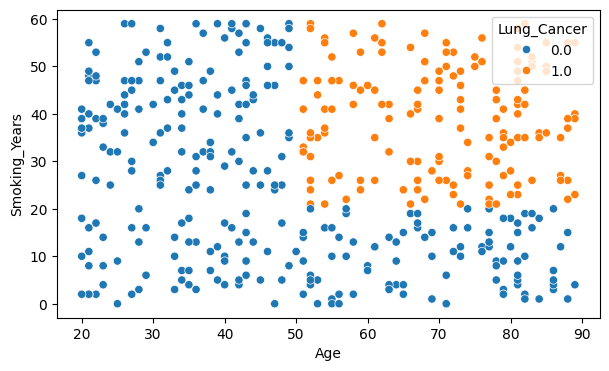

In [156]:
plt.figure(figsize=(7,4))
sns.scatterplot(x="Age",y="Smoking_Years",hue="Lung_Cancer",data=dataset)
plt.show()

In [142]:
x=dataset.iloc[:,:-1]
y=dataset["Lung_Cancer"]
y=y.astype(np.int64)
y

0      0
1      0
2      0
3      0
4      0
      ..
437    1
438    0
439    1
440    0
441    1
Name: Lung_Cancer, Length: 442, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [145]:
from sklearn.neighbors import KNeighborsClassifier

In [146]:
model=KNeighborsClassifier(n_neighbors=3)

In [147]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [148]:
model.score(x_test,y_test)*100

97.17514124293785

In [150]:
model.score(x_train,y_train)*100

97.72727272727273

In [154]:
model.predict([[52,59]]) #52	59	1.0

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [151]:
# for i in range(1,30):
#     model=KNeighborsClassifier(n_neighbors=i)
#     model.fit(x_train,y_train)
#     ml_test=model.score(x_test,y_test)*100
#     ml_train=model.score(x_train,y_train)*100
#     print(i,ml_test,ml_train)

    

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

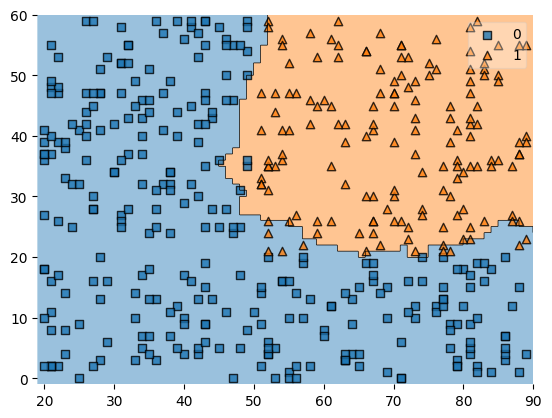

In [152]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=model)